In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
file='website-landings'

df=pd.read_csv(file+'.csv')
df

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,f7093a95,2024-02-02 01:19:03,0,google,organic search,NaN
1,f7093a95,2024-02-20 17:53:27,0,google,organic search,NaN
2,f7093a95,2024-03-03 04:51:34,0,google,organic search,NaN
3,f7093a95,2024-04-23 04:28:26,0,NaN,direct,NaN
4,f7093a95,2024-04-23 04:29:56,0,NaN,direct,NaN
...,...,...,...,...,...,...
2913106,9c6b6077,2024-05-28 00:00:35,0,facebook,paid,NaN
2913107,31aa3826,2024-05-28 00:01:20,0,facebook,paid,NaN
2913108,822ef39f,2024-05-28 00:00:58,0,facebook,paid,NaN
2913109,f31cf3e7,2024-05-28 00:00:21,0,facebook,paid,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913111 entries, 0 to 2913110
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   User Id               object
 1   Website Landing Time  object
 2   Is Converted          int64 
 3   Source                object
 4   Channel               object
 5   Campaign Type         object
dtypes: int64(1), object(5)
memory usage: 133.4+ MB


In [ ]:
df.isnull().sum()

,0
User Id,0
Website Landing Time,0
Is Converted,0
Source,1730280
Channel,0
Campaign Type,2251491


In [ ]:
df['Website Landing Time']=pd.to_datetime(df['Website Landing Time'],errors='coerce')

In [ ]:

df['Source'].fillna('Unknown', inplace=True)

df['Campaign Type'].fillna('Unknown', inplace=True)

df['Channel'].fillna('Unknown', inplace=True)

df['Is Converted'].fillna(0, inplace=True)




In [ ]:
df.isnull().sum()

,0
User Id,0
Website Landing Time,0
Is Converted,0
Source,0
Channel,0
Campaign Type,0


In [ ]:

for index, row in df.iterrows():
    if row['Source'] == 'Unknown':
        df.at[index, 'Source'] = 'Direct'

In [ ]:
df['month']=df['Website Landing Time'].dt.month

In [ ]:
df=df.drop('User Id', axis=1)
df=df.drop('Website Landing Time', axis=1)

In [ ]:
df

,Is Converted,Source,Channel,Campaign Type,month
0,0,google,organic search,Unknown,2
1,0,google,organic search,Unknown,2
2,0,google,organic search,Unknown,3
3,0,Direct,direct,Unknown,4
4,0,Direct,direct,Unknown,4
...,...,...,...,...,...
2913106,0,facebook,paid,Unknown,5
2913107,0,facebook,paid,Unknown,5
2913108,0,facebook,paid,Unknown,5
2913109,0,facebook,paid,Unknown,5


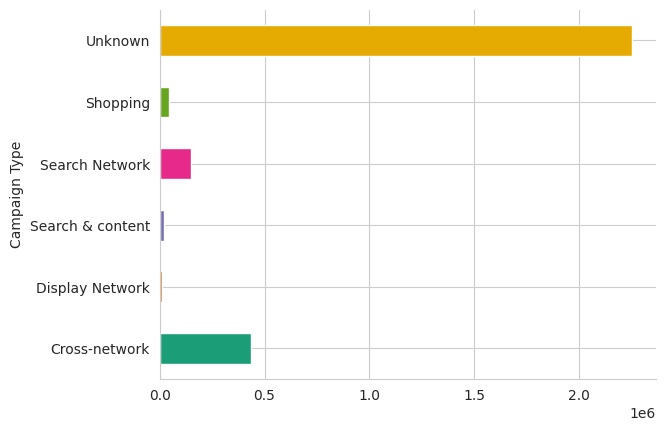

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Campaign Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

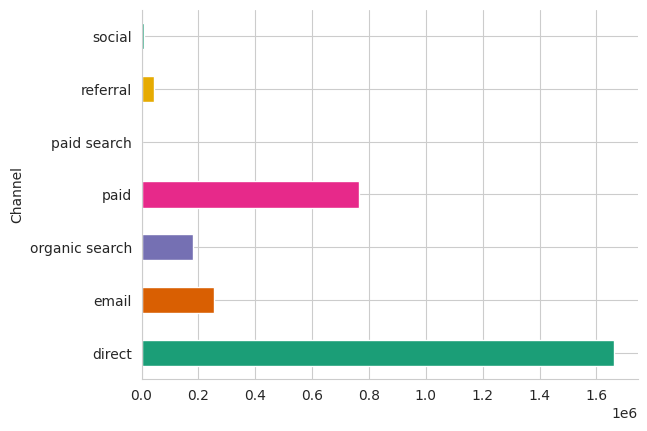

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

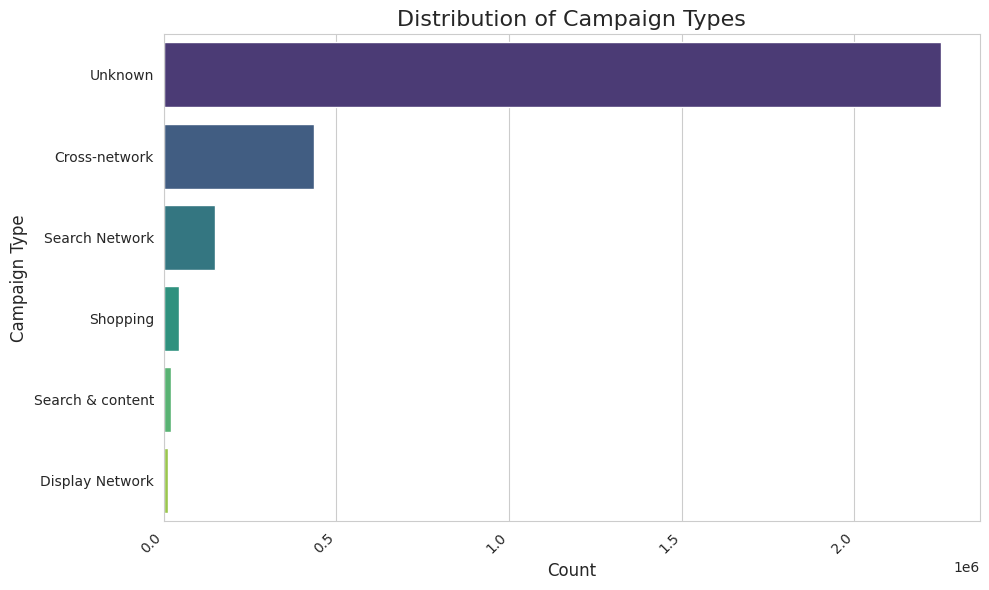

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Campaign Type', palette='viridis', order=df['Campaign Type'].value_counts().index)
plt.title('Distribution of Campaign Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Campaign Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




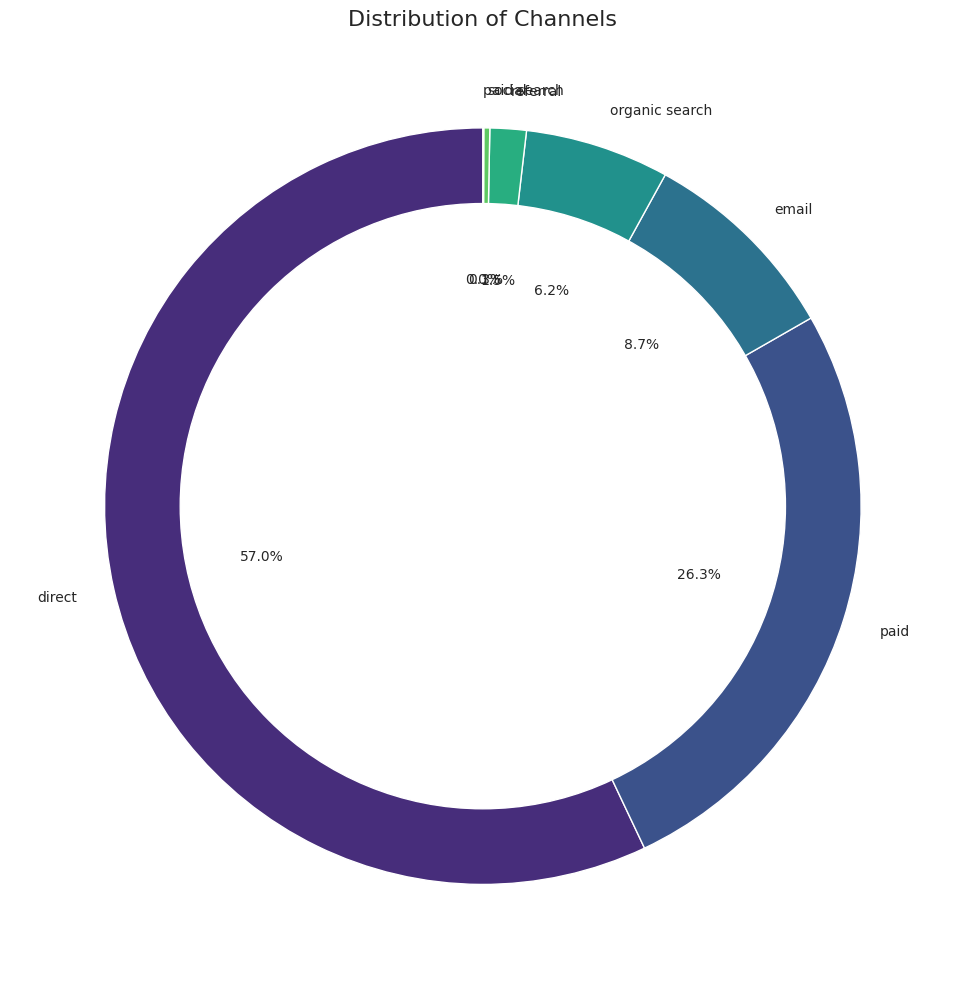

In [ ]:



channel_counts = df['Channel'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(channel_counts)))
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Channels', fontsize=16)
plt.tight_layout()
plt.show()

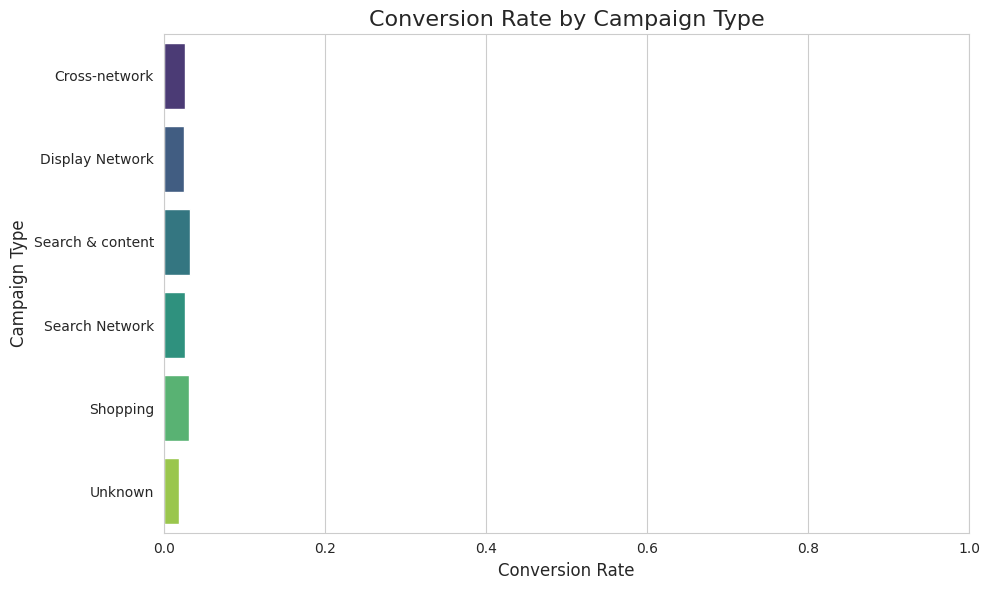

In [ ]:
# Conversion Rate by Campaign Type
conversion_by_campaign = df.groupby('Campaign Type')['Is Converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_by_campaign, x='Is Converted', y='Campaign Type', palette='viridis')
plt.title('Conversion Rate by Campaign Type', fontsize=16)
plt.xlabel('Conversion Rate', fontsize=12)
plt.ylabel('Campaign Type', fontsize=12)
plt.xlim(0, 1)  # Set x-axis limits for conversion rate (0 to 1)
plt.tight_layout()
plt.show()

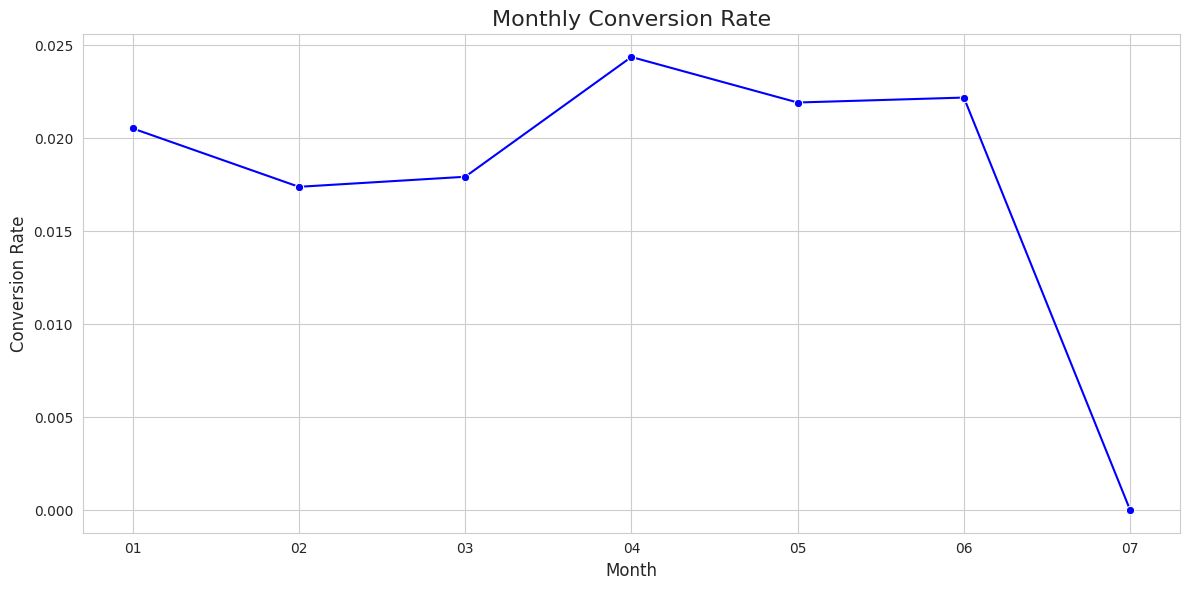

In [ ]:




monthly_conversion = df.groupby('month')['Is Converted'].mean().reset_index()


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_conversion, x='month', y='Is Converted', marker='o', color='blue')


plt.title('Monthly Conversion Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xticks(ticks=monthly_conversion['month'], labels=[f'{i:02d}' for i in monthly_conversion['month']])
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Group by multiple columns and calculate aggregates
aggregated_data = df.groupby(['month', 'Campaign Type']).agg({
    'Is Converted': 'mean',  # Calculate the average conversion rate

}).reset_index()

# Rename the column for clarity
aggregated_data.rename(columns={'Is Converted': 'Average Conversion Rate'}, inplace=True)



In [ ]:
aggregated_data

,month,Campaign Type,Average Conversion Rate
0,1,Cross-network,0.024875
1,1,Display Network,0.022164
2,1,Search & content,0.031170
3,1,Search Network,0.024668
4,1,Shopping,0.030361
5,1,Unknown,0.018975
6,2,Cross-network,0.024966
7,2,Display Network,0.025794
8,2,Search & content,0.033452
9,2,Search Network,0.024382


In [ ]:
aggregated_data.to_csv('company_data.csv', index=False)

In [ ]:
df['Source'].unique()

array(['google', 'Direct', 'listrak', 'youtube', 'facebook', 'bing',
       'yahoo!', 'duckduckgo', 'yahoo! mail', 'aol', 'mail.ru', 'yandex',
       'ecosia', 'gmail', 'twitter', 'instagram', 'reddit', 'linkedin',
       'pinterest', 'earthlink', 'telegram', 'infospace', 'amazon',
       'tiktok', 'bronto', 'aol mail', 'snapchat', 'outlook.com',
       'kvasir', 'vkontakte', 'zoho', 'skype', 'qwant', 'baidu', 'quora'],
      dtype=object)

In [ ]:
df['Channel'].unique()

array(['organic search', 'direct', 'paid', 'email', 'social', 'referral',
       'paid search'], dtype=object)

In [ ]:
df['Channel'].unique()

array(['organic search', 'direct', 'paid', 'email', 'social', 'referral',
       'paid search'], dtype=object)

In [ ]:
df['Campaign Type'].unique()

array(['Unknown', 'Cross-network', 'Search Network', 'Shopping',
       'Search & content', 'Display Network'], dtype=object)